# `geom_hex()`

In [1]:
from math import sqrt

import numpy as np
import pandas as pd

from lets_plot import *


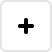
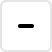
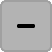
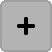
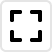
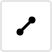
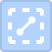
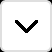
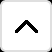
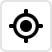
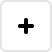
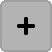
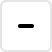
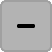
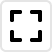
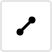
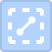
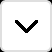
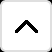
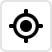

In [2]:
LetsPlot.setup_html()

In [3]:
height_coeff = sqrt(3) / 2

In [4]:
data = {
    'x': [-10, -10, 10, 9, 11],
    'y': [v * height_coeff for v in [-10, 10, -10, 9, 11]],
    'w': [2, 4, 8, 1, 1],
}

In [5]:
identity_data = {
    'x': [-.5, .5, 0],
    'y': [0, 0, height_coeff],
    'g': [1, 1, 2],
    'h': [1] * 3,
}

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Basic example with default stat

In [7]:
ggplot(df, aes("cty", "hwy")) + geom_hex()

## Basic example with `'identity'` stat

In [8]:
ggplot(identity_data, aes('x', 'y', fill='g')) + geom_hex(aes(height='h'), stat='identity')

## Aesthetics

In [9]:
gggrid([
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20]) + geom_point(color='red') + ggtitle("Default"),
    ggplot(data, aes('x', 'y')) + geom_hex(width=10, binwidth=[20, 20]) + geom_point(color='red') + ggtitle("width=10"),
    ggplot(data, aes('x', 'y')) + geom_hex(height=10, binwidth=[20, 20]) + geom_point(color='red') + ggtitle("height=10"),
    ggplot(data, aes('x', 'y')) + geom_hex(aes(weight='w'), binwidth=[20, 20]) + geom_text(aes(label='w'), color='red') + ggtitle("weight='w'"),
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20], alpha=.25) + geom_point(color='red') + ggtitle("alpha=.25"),
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20], size=1, color='red', linetype='longdash') + geom_point(color='red') + ggtitle("size=2, color='red', linetype='longdash'"),
    ggplot(data, aes('x', 'y')) + geom_hex(aes(fill='..density..'), binwidth=[20, 20]) + geom_point(color='red') + ggtitle("fill='..density..'"),
], ncol=2)

## Parameters

### `bins`/`binwidth`

In [10]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + geom_hex(),
    ggplot(df, aes("cty", "hwy")) + geom_hex(bins=[6, 7]),
    ggplot(df, aes("cty", "hwy")) + geom_hex(binwidth=[5, 5]),
])

### `drop`

In [11]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + geom_hex(),
    ggplot(df, aes("cty", "hwy")) + geom_hex(drop=False),
])

### `tooltips`

In [12]:
ggplot(df, aes("cty", "hwy")) + \
    geom_hex(tooltips=layer_tooltips().title("(^x, ^y)")\
                                      .line("count|@..count..")\
                                      .line("density|@..density..").format("@..density..", ".3~f"))

### `position`

In [13]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + geom_hex(binwidth=[4, 4]),
    ggplot(df, aes("cty", "hwy")) + geom_hex(binwidth=[4, 4], position=position_nudge(x=2, y=2)),
])

### `orientation`

In [14]:
gggrid([
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20]) + geom_point(color='red'),
    ggplot(data, aes('x', 'y')) + geom_hex(binwidth=[20, 20], orientation='y') + geom_point(color='red'),
])

### `inherit_aes`

In [15]:
gggrid([
    ggplot(identity_data, aes(color='g')) + \
        geom_hex(aes('x', 'y', fill='g', height='h'), stat='identity', size=2, alpha=.3),
    ggplot(identity_data, aes(color='g')) + \
        geom_hex(aes('x', 'y', fill='g', height='h'), stat='identity', size=2, alpha=.3, inherit_aes=False),
])

### `manual_key`

In [16]:
ggplot(df, aes("cty", "hwy")) + geom_hex(manual_key="Manual key")

### `sampling`

In [17]:
# At least it works as well as it does for `geom_bin2d()`

def sampling_plot(sampling):
    return ggplot(df, aes("cty", "hwy")) + \
        geom_hex(sampling=sampling) + \
        ggtitle(str(sampling).replace("\n", " "))

gggrid([
    sampling_plot(sampling_pick(5)),
    sampling_plot(sampling_random(5, seed=42)),
    sampling_plot(sampling_systematic(5)),
], ncol=2)

### `color_by`/`fill_by`

In [18]:
ggplot(df, aes("cty", "hwy")) + \
    geom_hex(aes(paint_a="..count..", paint_b="..count.."),
             binwidth=[3, 3], size=1, color_by='paint_a', fill_by='paint_b') + \
    scale_gradient('paint_a', low="black", high="red", guide=guide_colorbar(title="count (border)")) + \
    scale_gradient('paint_b', low="black", high="yellow", guide=guide_colorbar(title="count (figure)"))

## Change geometry

In [19]:
ggplot(df, aes("cty", "hwy")) + \
    geom_point(aes(color='..count..'), stat='binhex', binwidth=[3, 3],
               shape=17, size=3, size_unit='x') + \
    coord_fixed()

## With other layers

In [20]:
ggplot(df, aes("cty", "hwy")) + \
    geom_hex(binwidth=[5, 5], color="white", size=.5) + \
    geom_point(color="white", size=1.5) + \
    ggmarginal('tr', layer=geom_histogram(binwidth=5, color="lightgray", fill="white")) + \
    facet_grid(x="year") + \
    scale_x_continuous(breaks=list(range(0, 40, 5))) + \
    scale_y_continuous(breaks=list(range(0, 50, 5))) + \
    xlim(0, 40) + ylim(0, 50) + \
    theme_minimal() + \
    flavor_darcula()

In [21]:
gggrid([
    ggplot(df, aes("cty", "hwy")) + \
        geom_hex(binwidth=[5, 5]) + \
        ggtitle("Default coord"),
    ggplot(df, aes("cty", "hwy")) + \
        geom_hex(binwidth=[5, 5]) + \
        coord_flip() + \
        ggtitle("coord_flip()"),
    ggplot(df, aes("cty", "hwy")) + \
        geom_hex(binwidth=[5, 5]) + \
        coord_polar() + \
        ggtitle("coord_polar()"),
])

## Tests

In [22]:
def get_grid_data(n, m):
    return {
        'x': [i for i in range(n) for j in range(m)],
        'y': [j * height_coeff for i in range(n) for j in range(m)],
    }

def get_grid_plot(n, m, w, h):
    return ggplot(get_grid_data(n, m), aes('x', 'y')) + \
        geom_hex(binwidth=[w, h]) + \
        geom_point(color="red") + \
        ggtitle("binwidth=[{0}, {1}]".format(w, h))

gggrid([
    get_grid_plot(2, 2, 1, 1),
    get_grid_plot(2, 2, 2, 2),
    get_grid_plot(4, 4, 2, 2),
    get_grid_plot(4, 4, 1, 4),
    get_grid_plot(4, 4, 4, 1),
], ncol=2)

In [23]:
tests = [
    {
        'title': "Empty data",
        'data': {
            'x': [],
            'y': [],
        }
    },
    {
        'title': "One element",
        'data': {
            'x': [0],
            'y': [0],
        }
    },
    {
        'title': "NaN's in data",
        'data': {
            'x': [0, 1, np.nan, None, 1, 1],
            'y': [0, 1, 1, 1, np.nan, None],
        }
    },
    {
        'title': "Empty data, identity stat",
        'data': {
            'x': [],
            'y': [],
        },
        'stat': 'identity'
    },
    {
        'title': "One element, identity stat",
        'data': {
            'x': [0],
            'y': [0],
        },
        'stat': 'identity'
    },
    {
        'title': "NaN's in data, identity stat",
        'data': {
            'x': [0, 1, np.nan, None, 1, 1],
            'y': [0, 1, 1, 1, np.nan, None],
        },
        'stat': 'identity'
    },
]

gggrid([
    ggplot(t['data'], aes('x', 'y')) + \
        geom_hex(stat=t['stat'] if 'stat' in t else None) + \
        ggtitle(t['title'])
    for t in tests
], ncol=2)

In [24]:
def get_test_plot(x, y):
    h = 2 * height_coeff
    test_data = {
        'x': [-2, 0, -3, -1, 1, -2, 0] + [x],
        'y': [-h, -h, 0, 0, 0, h, h] + [y],
        'g': ["center"] * 7 + ["border"]
    }
    return ggplot(test_data, aes('x', 'y')) + \
        geom_hex(binwidth=[2, 2], show_legend=False) + \
        geom_point(aes(color='g')) + \
        scale_color_manual(values=["red", "green"]) + \
        coord_fixed(ratio=1)

hh = 1 / height_coeff
gggrid([
    get_test_plot(0, hh),
    get_test_plot(0.5, 3 * hh / 4),
    get_test_plot(1, hh / 2),
    get_test_plot(1, 0),
    get_test_plot(1, -hh / 2),
    get_test_plot(0.5, -3 * hh / 4),
    get_test_plot(0, -hh),
    get_test_plot(-0.5, -3 * hh / 4),
    get_test_plot(-1, -hh / 2),
    get_test_plot(-1, 0),
    get_test_plot(-1, hh / 2),
    get_test_plot(-0.5, 3 * hh / 4),
], ncol=3)

## Problems

### Wrong computations

In [25]:
# Fixed
test_data1 = {
    'x': [0, 0, 1, 1],
    'y': [0, 1, 0, 1],
}

ggplot(test_data1, aes('x', 'y')) + \
    geom_hex(binwidth=[1, 2]) + \
    geom_point(color="red")

In [26]:
# Fixed
coeff = 1e-15

test_data2 = {
    'x': [-coeff, coeff, 0],
    'y': [-6*coeff/height_coeff, 0, coeff/height_coeff],
}

ggplot(test_data2, aes('x', 'y')) + \
    geom_hex(binwidth=[coeff, 2*coeff]) + \
    geom_point(color="red")

### Too much stretching of the hexagons

In [27]:
# Fixed
test_data3 = {
    'x': [-10, -10, 10, 9, 11],
    'y': [v * height_coeff for v in [-10, 10, -10, 9, 11]],
}

ggplot(test_data3, aes('x', 'y')) + \
    geom_hex(binwidth=[10, 10]) + \
    geom_point(color='red')